In [1]:
import step1,step2,step3
from constants import *
from prophet import Prophet

stock data are downloaded in data/<stock_name>/stock_data.csv

functions in the step1 script can fit a model on data. The user can choose the model, the data, and rerun on original:forecasted data with different timeframe

09:35:48 - cmdstanpy - INFO - Chain [1] start processing
09:35:50 - cmdstanpy - INFO - Chain [1] done processing


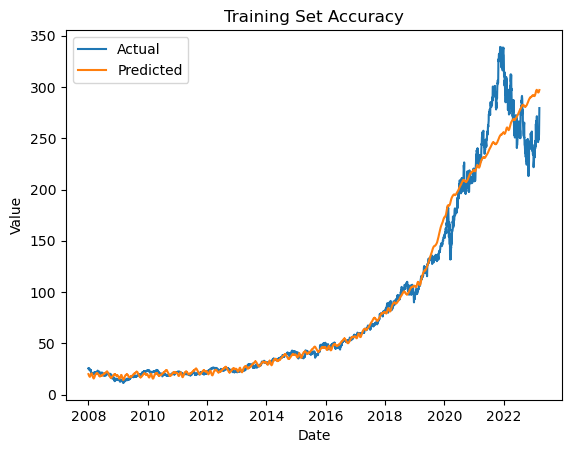

In [2]:
df=step1.load_csv('MSFT',forecaster=False)
model=step1.fit_model('MSFT',save=True)
step1.plot_training_accuracy('MSFT',save=True,show=True,forecaster=False)

In [3]:
forecast=step1.forecast('MSFT', horizon=30,save=True)

saved in: ./data/forecasted/MSFT/stock_data.csv


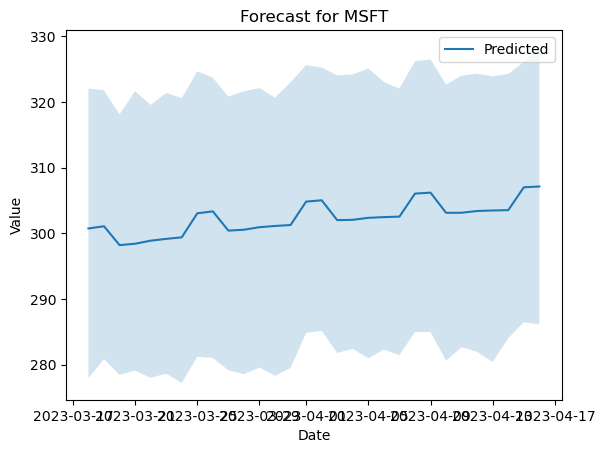

In [4]:
step1.plot_forecast('MSFT',forecast,save=True,show=True)

In [7]:
forecast.iloc[0]['yhat']

300.72982360758647

In [17]:
temp=step1.load_csv(stock,forecaster=True)

In [23]:
import pandas as pd
aggregated=pd.DataFrame()
for stock in ['MSFT','MSFT']:
    temp=step1.load_csv(stock,forecaster=True)
    aggregated[stock]=temp['y']


In [25]:
aggregated.pct_change()

,MSFT
0,NaN
1,0.1132%
2,-0.9532%
3,0.0692%
4,0.1561%
5,0.0920%
6,0.0781%
7,1.2219%
8,0.0974%
9,-0.9658%


In [9]:
returns=step2.calculate_returns(forecast)

TypeError: cannot perform __truediv__ with this index type: DatetimeArray

In [ ]:
step2.build_portfolio()

In [8]:
for stock,company in company_dict.items():
    print(stock)

AAPL
MSFT
AMZN
GOOGL
TSLA
NVDA
JPM
JNJ
V
PG
MA
HD
UNH
PYPL
DIS
BAC
NFLX
VZ
CMCSA


In [ ]:
create forecasted data for every stock i 

In [ ]:
stock_symbols = get_n_largest_companies(N_LARGEST_COMPANIES)
download_stock_data(stock_symbols)


In [ ]:
stock_data = {}
for stock in stock_symbols:
    stock_data[stock] = pd.read_csv(os.path.join(STOCKS_DIR, stock, 'historical_data.csv'), index_col=0, parse_dates=True)['Adj Close']

stock_returns = pd.DataFrame(stock_data).pct_change().dropna()


In [ ]:
model = ProphetModel()
model.fit(stock_returns)


In [ ]:
portfolio_optimizer = PortfolioOptimizer(stock_returns)
portfolio_optimizer.calculate_metrics()
portfolio_optimizer.optimize()


In [ ]:
plot_efficient_frontier(portfolio_optimizer.portfolio)
plot_forecast(stock_returns, model, periods=365)
plot_monte_carlo_simulation(portfolio_optimizer.portfolio, periods=365, simulations=1000)
plot_donut_repartition(portfolio_optimizer.portfolio)
